# Codveda Technologies Internship
## Task 1: Build a Random Forest Classifier
**Intern:** Muhammad Sakibur Rahaman
**Dataset Used:** churn-bigml80.csv

### Objective

The dataset **`churn-bigml-80.csv`** contains customer data with features related to account info, usage patterns, and customer interactions.

✅ **Key Features:**

- **Demographics:** `State`, `Area code`
- **Account Info:** `Account length`, `International plan`, `Voice mail plan`, `Number vmail messages`
- **Call Metrics:** `Total day/eve/night mins`, `Total calls`, `Total charges`
- **International Calls:** `Total intl mins/calls/charges`
- **Customer Service:** `Customer service calls`
- **Target Variable:** `Churn` (whether the customer left: True/False)

We will preprocess the dataset to prepare it for machine learning.


---
## Importing Dependencies
We import the corresponding Python libraries necessary for data analysis and modeling.



In [247]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries imported for data handling, model building, and evaluation
print("Libraries imported successfully!")

Libraries imported successfully!


## Step 1: Data Overview
We load the house price dataset to explore its structure, data types, and check for missing values.

In [248]:
#Mounting Goggle Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
#Loading Data
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Task List/churn-bigml-80.csv')

In [250]:
#Displaying Firt Couple of Rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [251]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [252]:
#Data Describe
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Dataset Summary**

Rows: 7043

Columns: 20

Each row = 1 customer record

Goal: Predict Churn (Yes/No)

Features: Customer info, services, charges, contract

Target column: Churn

Missing values: 11 in TotalCharges

# Churn Visualization

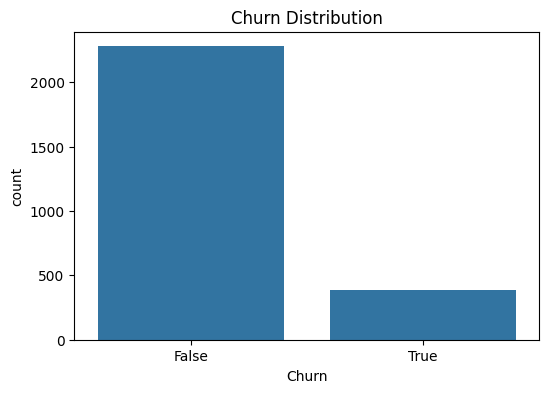


Churn Value Counts:
Churn
False    2278
True      388
Name: count, dtype: int64


In [253]:
#Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

print("\nChurn Value Counts:")
print(df['Churn'].value_counts())


# Explanation:
   - This shows how many customers churned vs. stayed.
   - Imbalance is important for choosing evaluation metrics.


#  Data Preprocessing
- Categorical features (`State`, `International plan`, `Voice mail plan`) → converted to dummy variables
- Target column `Churn` → converted to integer (0 = No churn, 1 = Churn)
- Dropped `Area code` → not relevant for prediction
- Dataset split: **80% train / 20% test**

In [254]:
#Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['State', 'International plan', 'Voice mail plan'])

#data displaying
df.tail()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2661,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,False,False,False,False,False,False,True,False,True,False
2662,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,False,False,False,False,False,False,True,False,False,True
2663,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,False,False,False,False,True,False,True,False,True,False
2664,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,False,False,False,False,False,False,True,False,True,False
2665,74,415,25,234.4,113,39.85,265.9,82,22.60,241.4,...,False,False,False,False,False,False,True,False,False,True


In [255]:
#Convert 'Churn' to integer (0/1)
df['Churn'] = df['Churn'].astype(int)

In [256]:
#Drop 'Area code' column (non-informative)
df = df.drop(columns=['Area code'])

In [257]:
df

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,False,False,False,False,False,False,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,False,False,False,False,False,False,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,False,False,False,False,False,False,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,False,False,False,False,False,False,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,...,False,False,False,False,False,False,True,False,True,False
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,False,False,False,False,False,False,True,False,False,True
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,False,False,False,False,True,False,True,False,True,False
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,False,False,False,False,False,False,True,False,True,False


# Data Spliting

We split features and target variable into training and testing sets.

In [258]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
#Printing data shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2132, 70)
X_test shape: (534, 70)
y_train shape: (2132,)
y_test shape: (534,)


## Model Training
We train the model as our dataset is ready for the training

In [259]:
#Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [260]:
#Hyperparameter Tuning (Example)
#Demonstrates how to search for better parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
rf_classifier = grid_search.best_estimator_  # Use the best model

Best parameters: {'max_depth': 10, 'n_estimators': 100}


In [261]:
# 🚀 Train the model on training data
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier trained successfully!")


Random Forest Classifier trained successfully!


## Evaluate Model
We evaluate the model’s performance using f1_score and roc_auc_score.

In [262]:
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:,1]  # needed for roc_auc_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9120
F1 Score: 0.5841
ROC AUC Score: 0.8986


# Explanation:
- Accuracy: Overall correctness.
- F1 Score: Balance between precision and recall (important for imbalanced churn).
- ROC AUC: Ability to distinguish between churners and non-churners.


# Metrics Visualization

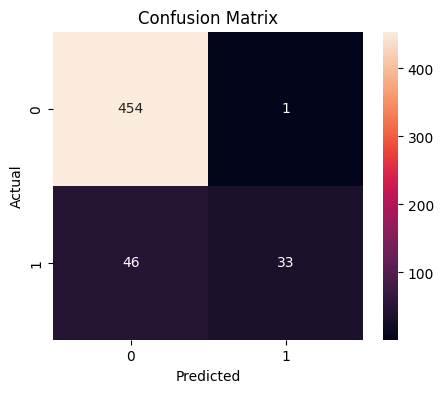

In [263]:
# 5.3 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


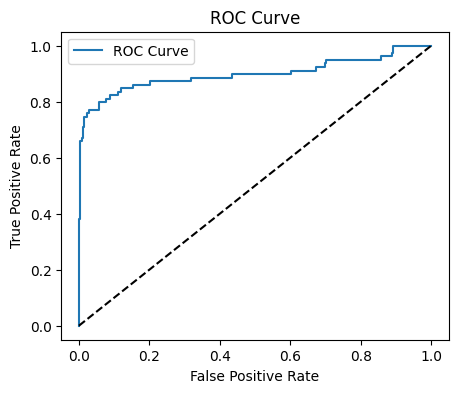

In [264]:
#ROC Curve Vosulaization
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Loading Test Data
we load test data to run the model on it and see the model performance.

In [265]:
# Load the test dataset
test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning Task List/churn-bigml-20.csv')
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## Test Data Overview

- Total rows: 333
- Total columns: 21
- Target column: `Churn`
- Features include:
    - `State` (categorical)
    - `Account length` (numeric)
    - `Area code` (categorical)
    - `International plan` (Yes/No)
    - `Voice mail plan` (Yes/No)
    - `Total day minutes`, `Total eve minutes`, `Total night minutes`
    - `Customer service calls` (numeric)
- The test data has the same structure as training data.
- We need to apply the same encoding (e.g., one-hot) as in training before prediction.


# Preprocessing Test Data
We preprocess test data like we did for train data

In [266]:
#Dropin non_informative column
test_data = test_data.drop(['State', 'Area code',], axis=1)
#Converting string to intrgar
test_data['International plan'] = test_data['International plan'].map({'No':0, 'Yes':1})
test_data['Voice mail plan'] = test_data['Voice mail plan'].map({'No':0, 'Yes':1})
test_data['Churn'] = test_data['Churn'].map({'False':0, 'True':1})

#Displaying data
test_data

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,NaN
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,NaN
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,NaN
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,NaN
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,NaN
663,106,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,NaN
664,60,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,NaN
665,159,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,NaN


In [267]:
#Encoding categorical variables SAME AS TRAINING
test_data = pd.get_dummies(test_data, drop_first=True)


In [268]:
#Align test data columns with train data columns,This ensures same number & order of columns
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data= test_data[X_train.columns]  # re-order columns


# Model Prediction With Test Data

We see the model performance with the test data

In [269]:
#Separate features and labels
X_test = test_data[X_train.columns]

#Predict 'Churn' using trained model
test_predictions = rf_classifier.predict(test_data)

#Add predictions back to original test_data dataframe
test_data['Predicted_Churn'] = test_predictions

#Display test data with predictions
test_data.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Predicted_Churn
0,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,...,0,0,0,0,0,0,0,0,0,0
1,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,...,0,0,0,0,0,0,0,0,0,0
2,161,0,332.9,67,56.59,317.8,97,27.01,160.6,128,...,0,0,0,0,0,0,0,0,0,1
3,111,0,110.4,103,18.77,137.3,102,11.67,189.6,105,...,0,0,0,0,0,0,0,0,0,0
4,49,0,119.3,117,20.28,215.1,109,18.28,178.7,90,...,0,0,0,0,0,0,0,0,0,0


In [270]:
# Get predictions for the original test set (X_test, y_test)
y_prob = rf_classifier.predict_proba(X_test.iloc[:len(y_test)])[:, 1]  # for ROC AUC, considering only original test set size
y_pred = rf_classifier.predict(X_test.iloc[:len(y_test)])  # considering only original test set size


# ✅ Evaluate and print metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8034
F1 Score: 0.0708
ROC AUC Score: 0.5264
